# Training: for housing price

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df.shape

(1460, 81)

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# First Step Removing null

In [6]:
# check the number of null values in each column
df.isnull().sum().sort_values(ascending = True)

Id                  0
TotalBsmtSF         0
Heating             0
SaleCondition       0
CentralAir          0
                 ... 
FireplaceQu       690
Fence            1179
Alley            1369
MiscFeature      1406
PoolQC           1453
Length: 81, dtype: int64

In [7]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [8]:
df['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [9]:
df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [10]:
df['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

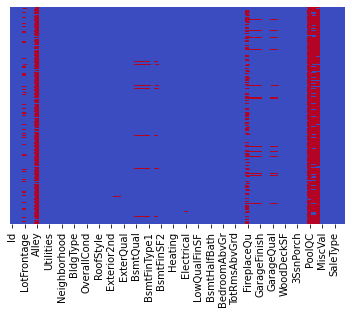

In [11]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'coolwarm')

In [12]:
df.shape

(1460, 81)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
# LotFrontage we replace mean of the whole column in the place of null value
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [15]:
# drop
'''Fence            1179
Alley            1369
MiscFeature      1406
PoolQC           1453'''

'Fence            1179\nAlley            1369\nMiscFeature      1406\nPoolQC           1453'

In [16]:
df.drop(['PoolQC'],axis=1,inplace=True)

In [17]:
df.shape

(1460, 80)

In [18]:
df.drop(['Alley'],axis=1,inplace=True)

In [19]:
df.shape

(1460, 79)

In [20]:
df.drop(['Fence','MiscFeature'],axis=1,inplace=True)

In [21]:
df.shape

(1460, 77)

In [22]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [23]:
df.shape

(1460, 76)

In [24]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [25]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [26]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [27]:
df.drop(['Id'],axis=1,inplace=True)

In [28]:
df.shape

(1460, 75)

In [29]:
df.isnull().sum().sort_values(ascending = True)

MSSubClass       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
                ..
MasVnrArea       8
MasVnrType       8
BsmtFinType1    37
BsmtExposure    38
BsmtFinType2    38
Length: 75, dtype: int64

In [30]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

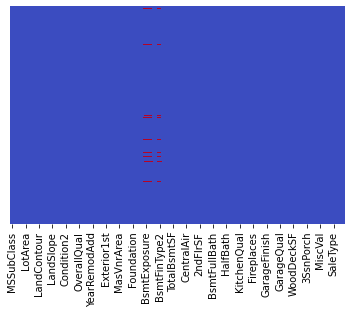

In [31]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [32]:
df['BsmtExposure']

0       No
1       Gd
2       Mn
3       No
4       Av
        ..
1455    No
1456    No
1457    No
1458    Mn
1459    No
Name: BsmtExposure, Length: 1460, dtype: object

In [33]:
df['BsmtFinType2']

0       Unf
1       Unf
2       Unf
3       Unf
4       Unf
       ... 
1455    Unf
1456    Rec
1457    Unf
1458    Rec
1459    LwQ
Name: BsmtFinType2, Length: 1460, dtype: object

In [34]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [35]:
df.isnull().sum().sort_values(ascending = True)

MSSubClass       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
                ..
RoofMatl         0
ExterCond        0
SalePrice        0
Electrical       1
BsmtFinType1    37
Length: 75, dtype: int64

In [36]:
df['BsmtFinType1']

0       GLQ
1       ALQ
2       GLQ
3       ALQ
4       GLQ
       ... 
1455    Unf
1456    ALQ
1457    GLQ
1458    GLQ
1459    BLQ
Name: BsmtFinType1, Length: 1460, dtype: object

In [37]:
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])

In [38]:
df.isnull().sum().sort_values(ascending = True)

MSSubClass      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
               ..
Exterior1st     0
RoofMatl        0
Foundation      0
SalePrice       0
Electrical      1
Length: 75, dtype: int64

In [39]:
df['Electrical']

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    FuseA
1459    SBrkr
Name: Electrical, Length: 1460, dtype: object

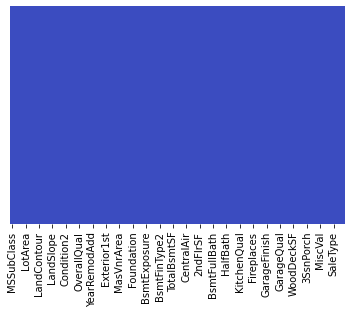

In [40]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [41]:
df.dropna(inplace=True)

In [42]:
df.shape

(1459, 75)

In [43]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


# Categorical Features

In [44]:
# Handling the categorical features
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [45]:
# check the length of the list
len(columns)

39

In [46]:
# this will can all feature and converting it into categorical feature 
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [47]:
main_df = df.copy()

# Combining training data and test data

In [48]:
test_df=pd.read_csv('formulatedtest.csv')

In [49]:
test_df.shape

(1459, 74)

In [50]:
test_df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.000000,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.000000,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.000000,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.000000,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.000000,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal
5,60,RL,75.000000,10000,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,84,0,0,0,0,0,4,2010,WD,Normal
6,20,RL,68.580357,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,21,0,0,0,0,500,3,2010,WD,Normal
7,60,RL,63.000000,8402,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,75,0,0,0,0,0,5,2010,WD,Normal
8,20,RL,85.000000,10176,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
9,20,RL,70.000000,8400,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,4,2010,WD,Normal


In [51]:
final_df = pd.concat([df,test_df],axis=0)

In [52]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2918, dtype: float64

In [53]:
final_df.shape

(2918, 75)

In [54]:
final_df = category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [55]:
final_df.shape

(2918, 236)

In [56]:
# this will remove duplicate
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [57]:
final_df.shape

(2918, 176)

In [58]:
final_df.head(50)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.000000,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.000000,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.000000,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.000000,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.000000,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0
5,50,85.000000,14115,5,5,1993,1995,0.0,732.0,0.0,...,0,0,1,1,0,0,0,0,0,0
6,20,75.000000,10084,8,5,2004,2005,186.0,1369.0,0.0,...,0,0,1,1,0,0,0,0,1,0
7,60,70.049958,10382,7,6,1973,1973,240.0,859.0,32.0,...,0,0,1,1,0,0,0,0,1,0
8,50,51.000000,6120,7,5,1931,1950,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0
9,190,50.000000,7420,5,6,1939,1950,0.0,851.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [59]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [60]:
df_Train.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.000000,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.000000,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.000000,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.000000,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.000000,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0
5,50,85.000000,14115,5,5,1993,1995,0.0,732.0,0.0,...,0,0,1,1,0,0,0,0,0,0
6,20,75.000000,10084,8,5,2004,2005,186.0,1369.0,0.0,...,0,0,1,1,0,0,0,0,1,0
7,60,70.049958,10382,7,6,1973,1973,240.0,859.0,32.0,...,0,0,1,1,0,0,0,0,1,0
8,50,51.000000,6120,7,5,1931,1950,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0
9,190,50.000000,7420,5,6,1939,1950,0.0,851.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [61]:
df_Test.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
1423,80,70.049958,19690,6,7,1966,1966,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,0
1424,20,70.049958,9503,5,5,1958,1983,0.0,457.0,374.0,...,1,0,0,0,0,0,0,1,0,0
1425,20,80.000000,10721,6,6,1959,1959,243.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
1426,60,81.000000,10944,7,5,1994,1994,448.0,1000.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1427,50,60.000000,10930,5,6,1945,1950,0.0,580.0,0.0,...,0,0,1,1,0,0,0,0,0,0
1428,30,60.000000,7200,5,7,1940,1992,294.0,510.0,0.0,...,0,0,1,1,0,0,0,0,0,0
1429,20,70.049958,12546,6,7,1981,1981,310.0,678.0,0.0,...,0,0,1,1,0,0,0,0,0,0
1430,60,60.000000,21930,5,5,2005,2005,0.0,0.0,0.0,...,0,0,1,0,0,1,0,0,0,0
1431,120,70.049958,4928,6,6,1976,1976,0.0,958.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1432,30,60.000000,10800,4,6,1927,2007,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0


In [62]:
df_Train.shape

(1422, 176)

In [63]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [73]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

# Predicting

In [75]:
import pip
pip.main(['install','xgboost'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

In [76]:
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [77]:
import xgboost
regressor=xgboost.XGBRegressor()


In [78]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [79]:
y_pred = classifier.predict(df_Test)

In [80]:
y_pred

array([214552.9  , 140416.4  , 150722.12 , ..., 176186.75 , 114906.984,
       215661.94 ], dtype=float32)

# Creating a sample submission file and submit


In [85]:
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('test.csv')
datasets = pd.concat([sub_df['Id'],pred],axis = 1)
datasets.columns = ['Id','SalePrice']
datasets.to_csv('submission.csv',index = False)

In [86]:
submission = pd.read_csv('submission.csv')

In [87]:
submission

,Id,SalePrice
0,1461.0,214552.900
1,1462.0,140416.400
2,1463.0,150722.120
3,1464.0,265656.160
4,1465.0,148504.640
...,...,...
1491,NaN,79871.510
1492,NaN,85282.945
1493,NaN,176186.750
1494,NaN,114906.984
